<a href="https://colab.research.google.com/github/JosueMachadoJr/deteccao-de-placas-python/blob/main/deteccao_de_placas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (19.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [2]:
!pip install pytesseract

In [4]:
!mkdir tessdata

mkdir: cannot create directory ‘tessdata’: File exists


In [6]:
import cv2
import pytesseract

In [7]:
imagem = cv2.imread('/content/trecho_livro.png')


In [5]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

--2024-06-13 13:58:35--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2024-06-13 13:58:35--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-06-13 13:58:35--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

In [9]:
from google.colab.patches import cv2_imshow


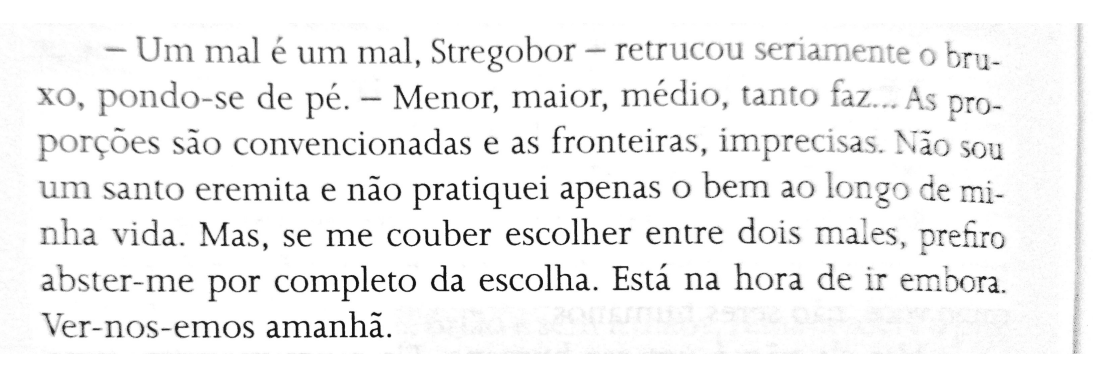

In [10]:
cv2_imshow(imagem)


In [11]:
texto = pytesseract.image_to_string(imagem)
print(texto)


— Um mal é um mal, Stregobor — retrucou seriamente 0 bry.
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... A
porgdes sao convencionadas e as fronteiras, imprecisas.
um santo eremita e nao pratiquei apenas 0 bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Esta na hora de ir embora.
Ver-nos-emos amanha.

 

S pro-

40 SOU

 

 



In [12]:
config_tesseract = '--tessdata-dir tessdata --psm 6'


In [13]:
texto = pytesseract.image_to_string(imagem, lang = 'por', config = config_tesseract)
print(texto)


— Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. ;
Ver-nos-emos amanhã. |



Lendo a placa de um carro

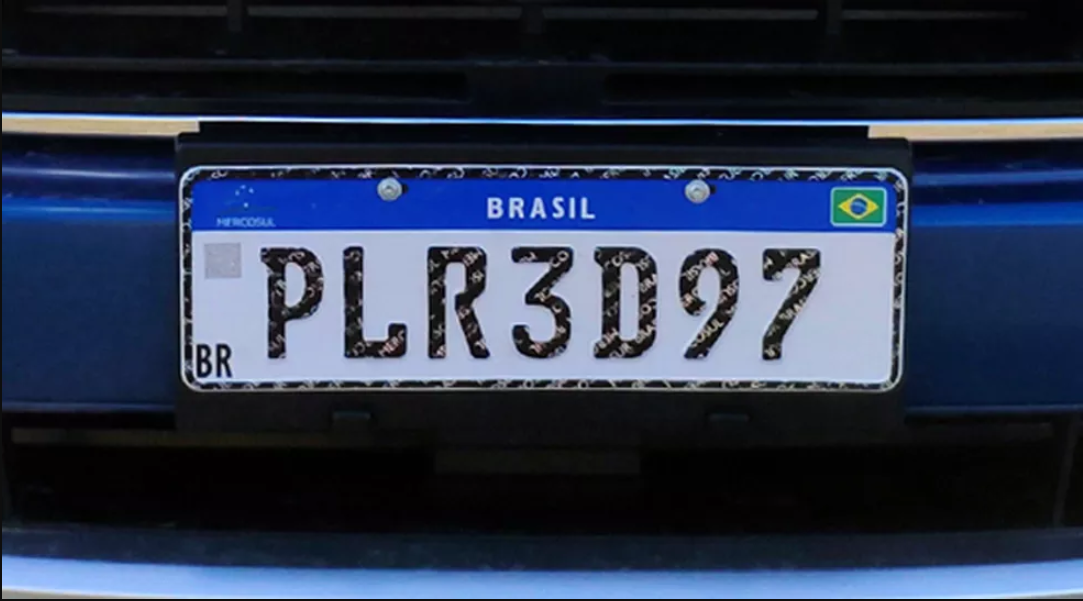

In [14]:
imagem = cv2.imread('/content/placa_carro1.png')
cv2_imshow(imagem)


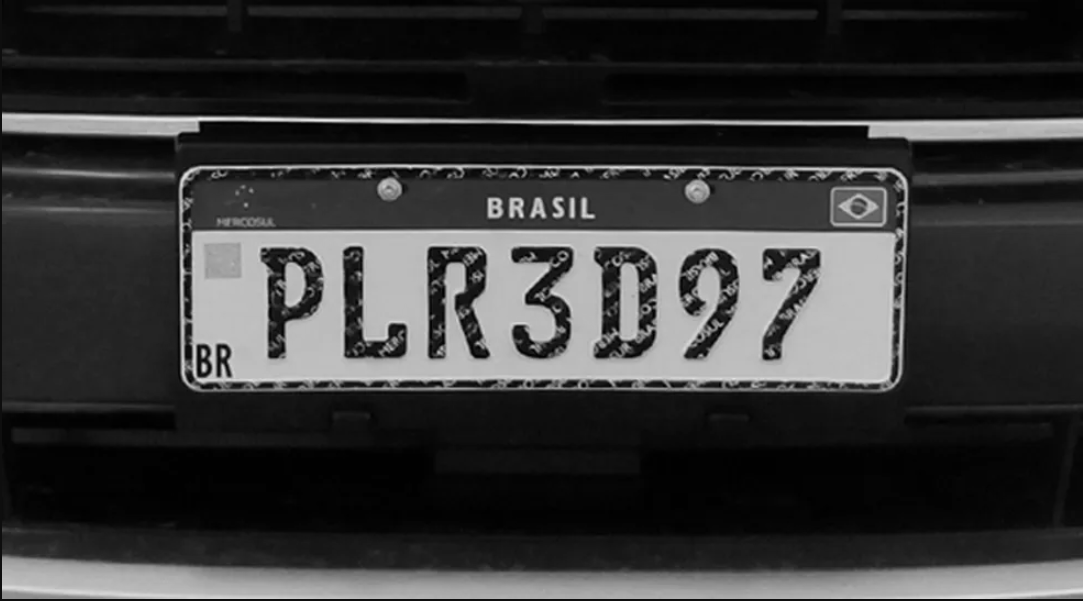

In [15]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem)


Aplicando limirarização

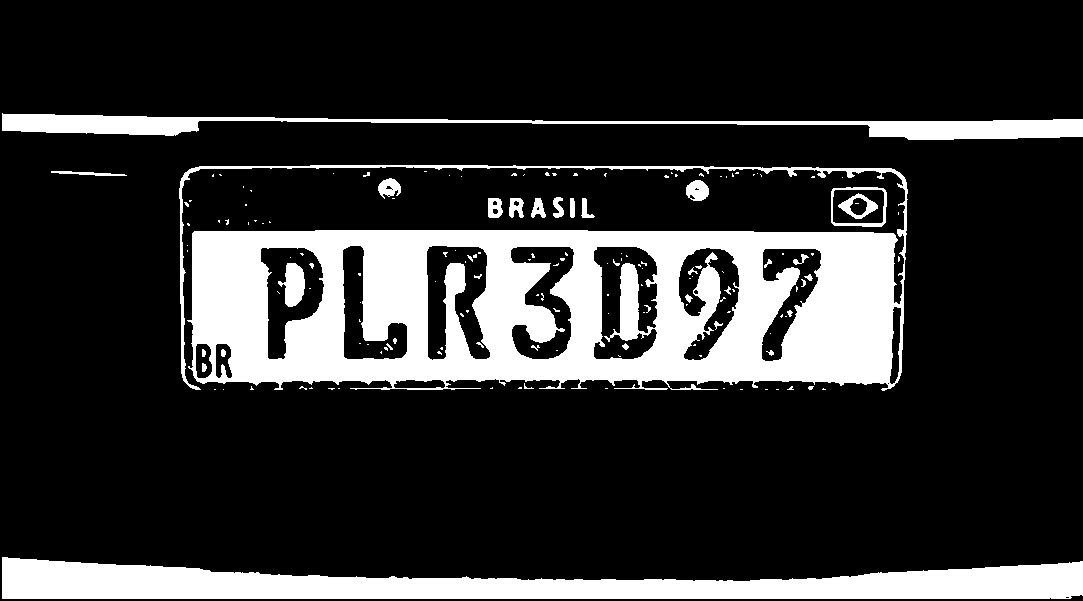

In [17]:
limiar = 127
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

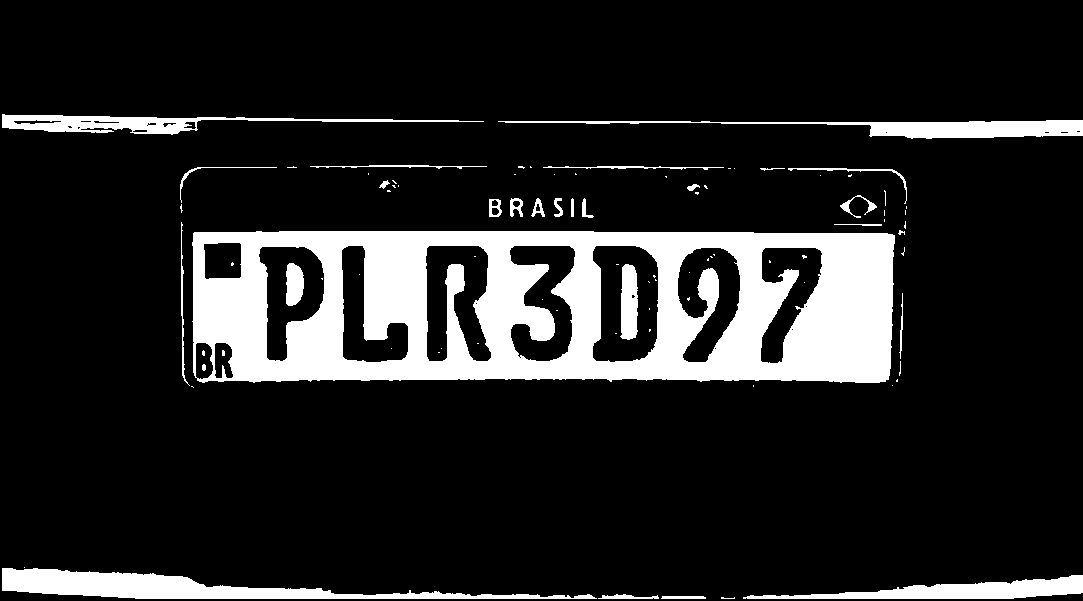

In [18]:
limiar = 170
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

Limiarização adaptativa

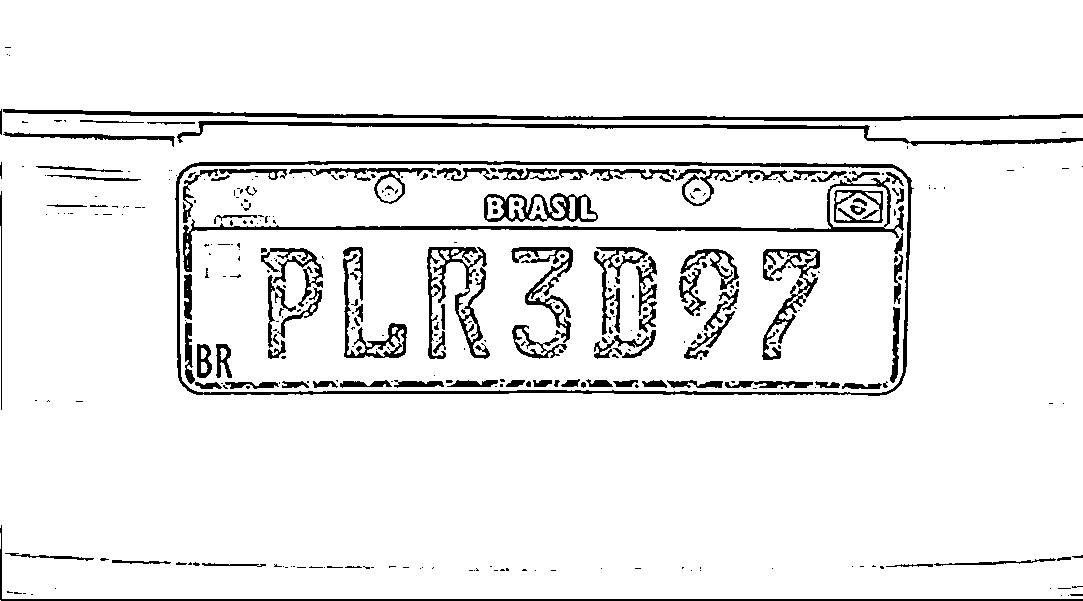

In [19]:
lim_adapt = cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
cv2_imshow(lim_adapt)

Limiarização de Otsu

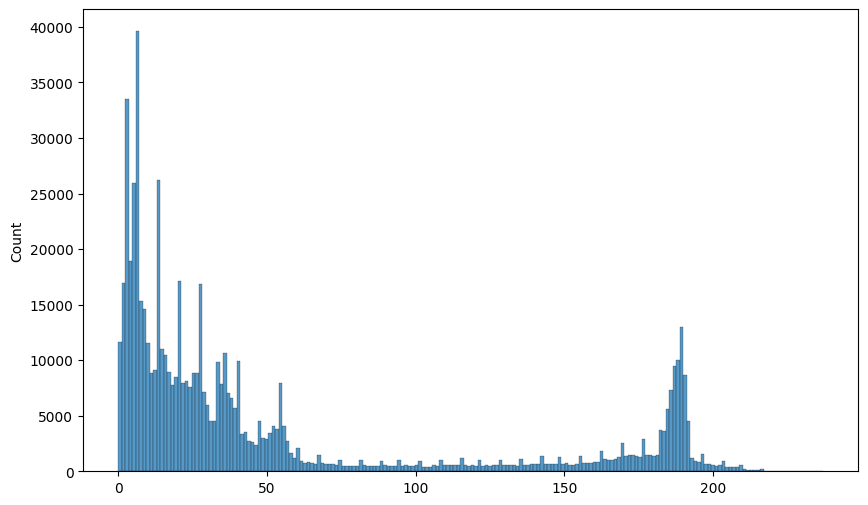

In [20]:
import seaborn as sns
ax = sns.histplot(imagem.flatten())
ax.figure.set_size_inches(10,6)

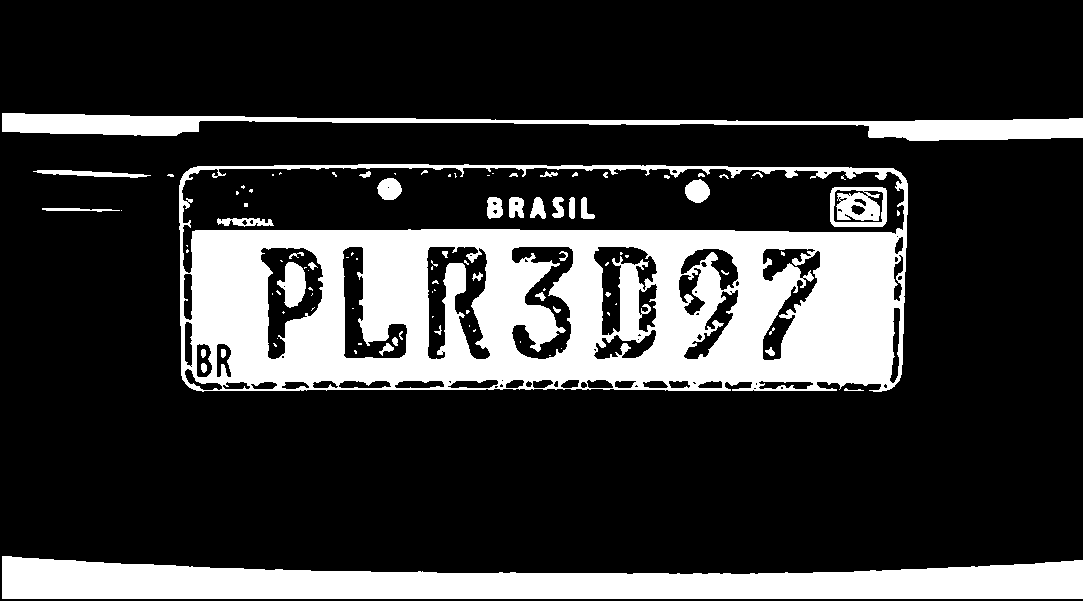

Limiar: 96.0


In [21]:
valor, lim_otsu = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(lim_otsu)
print(f'Limiar: {valor}')

Transformação morfológica

In [22]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

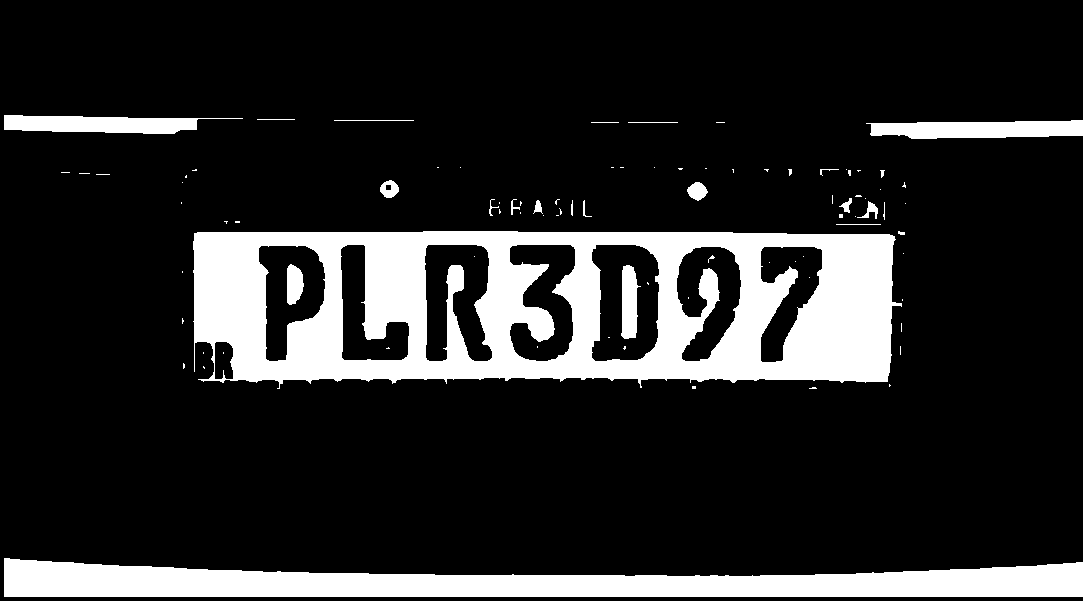

In [23]:
erosao = cv2.erode(lim_otsu, kernel)
cv2_imshow(erosao)

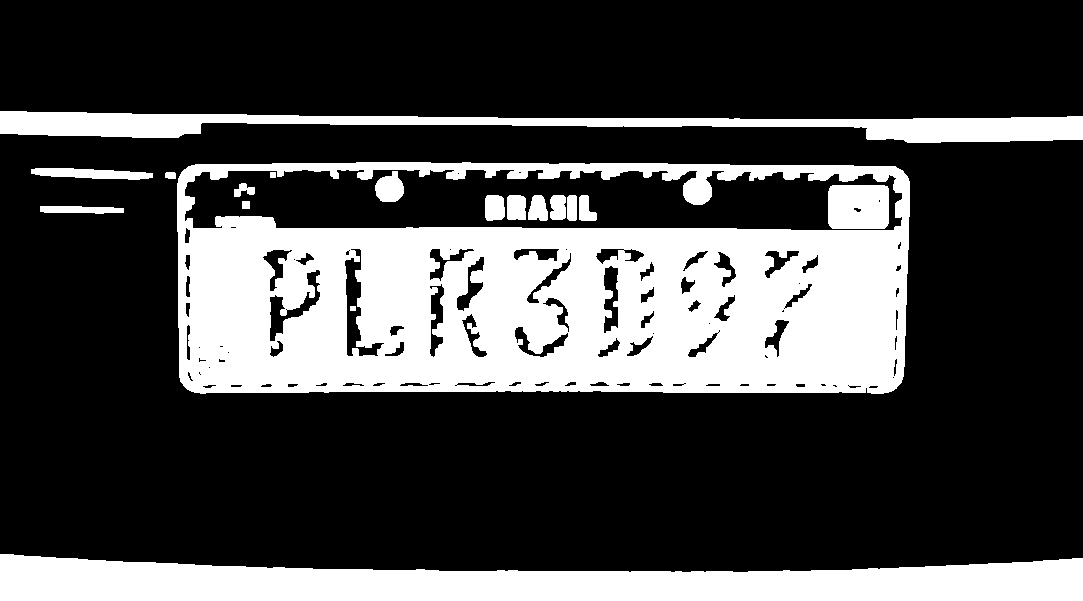

In [24]:
dilatacao = cv2.dilate(lim_otsu, kernel)
cv2_imshow(dilatacao)

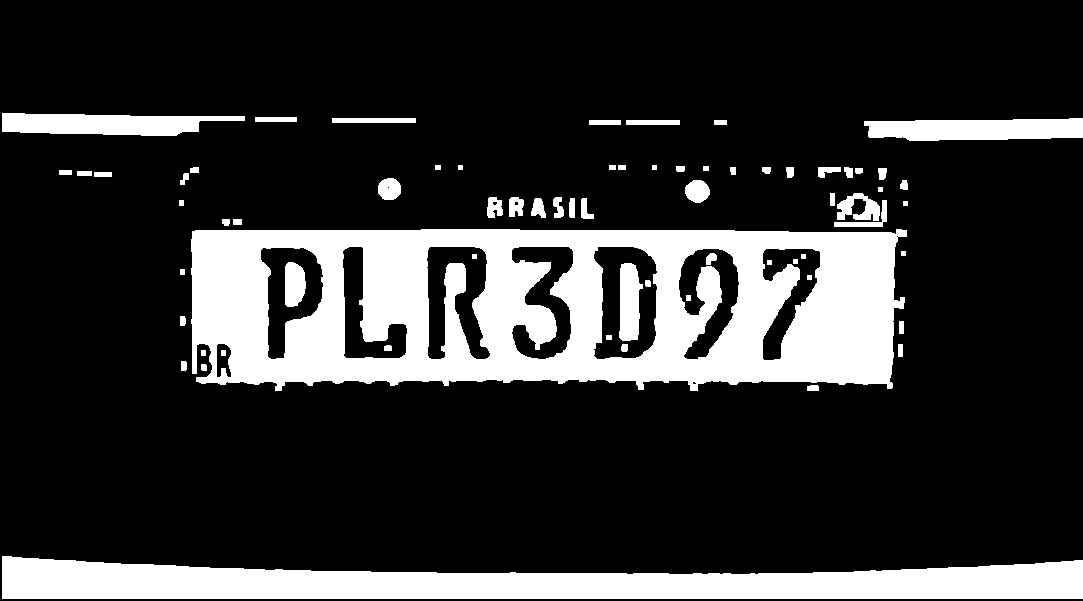

In [25]:
abertura = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)
cv2_imshow(abertura)

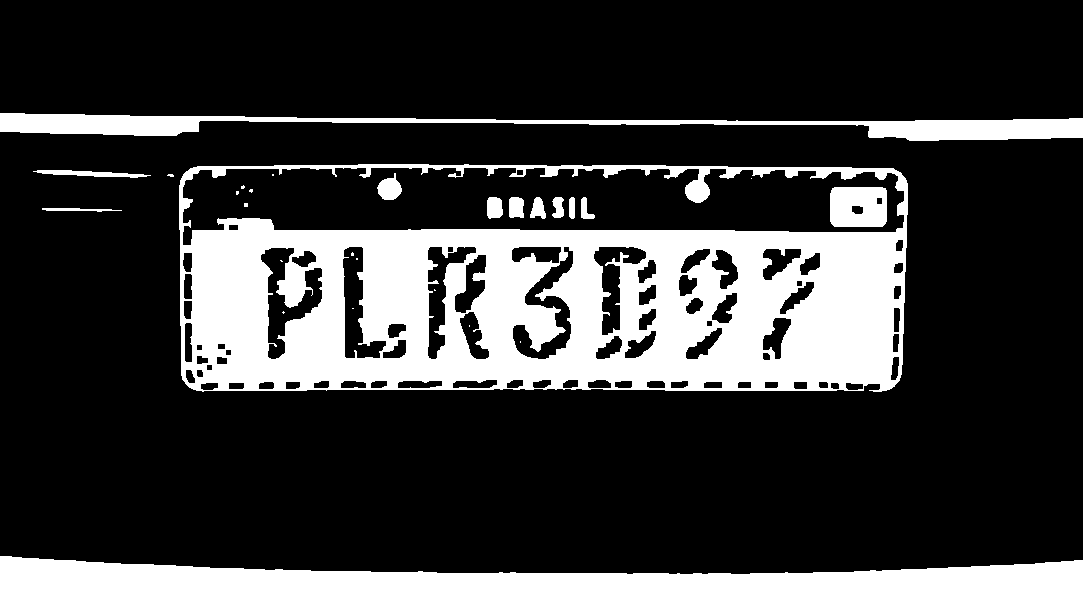

In [26]:
fechamento = cv2.morphologyEx(lim_otsu, cv2.MORPH_CLOSE, kernel)
cv2_imshow(fechamento)

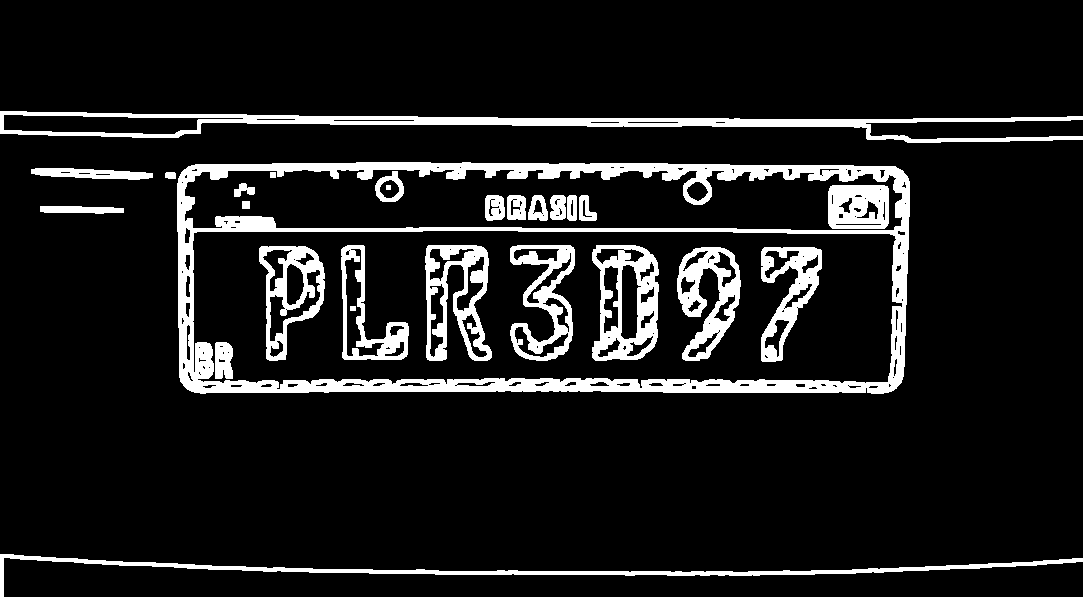

In [27]:
gradiente = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(gradiente)


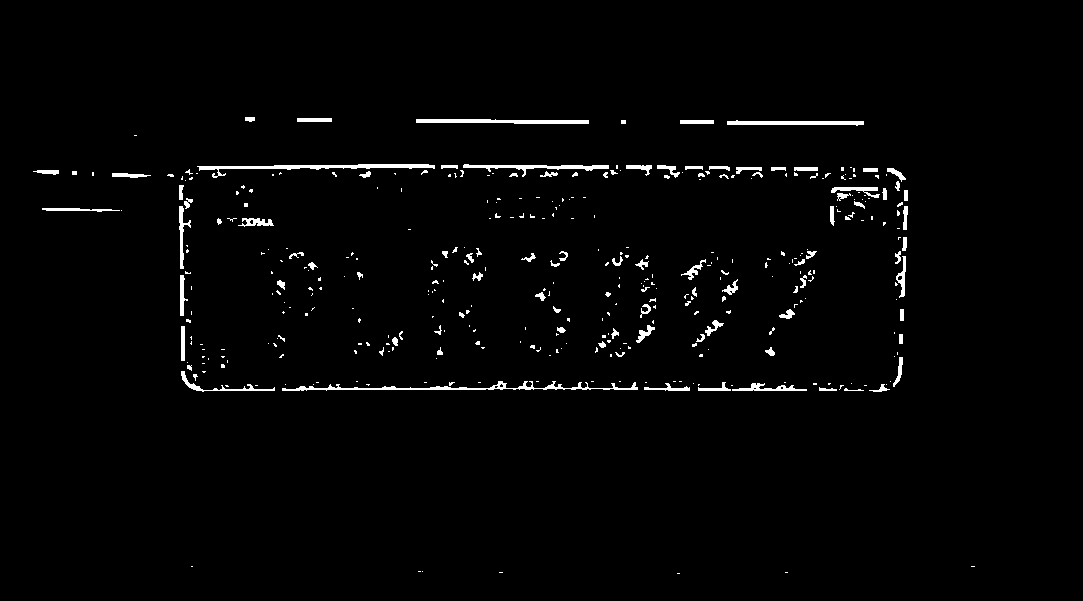

In [28]:
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel)
cv2_imshow(cartola)


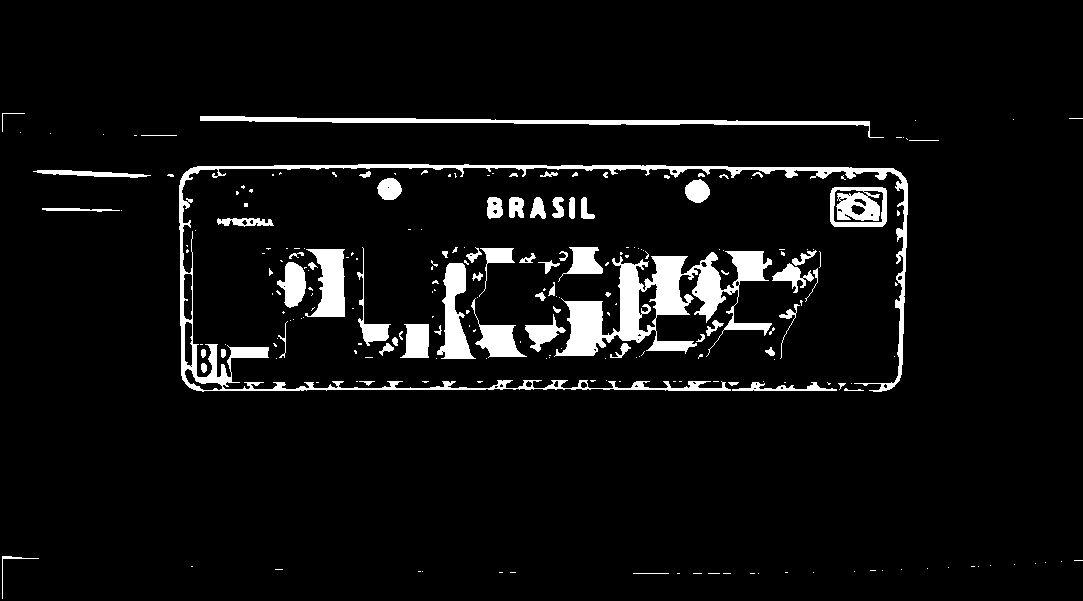

In [29]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel_retangular)
cv2_imshow(cartola)


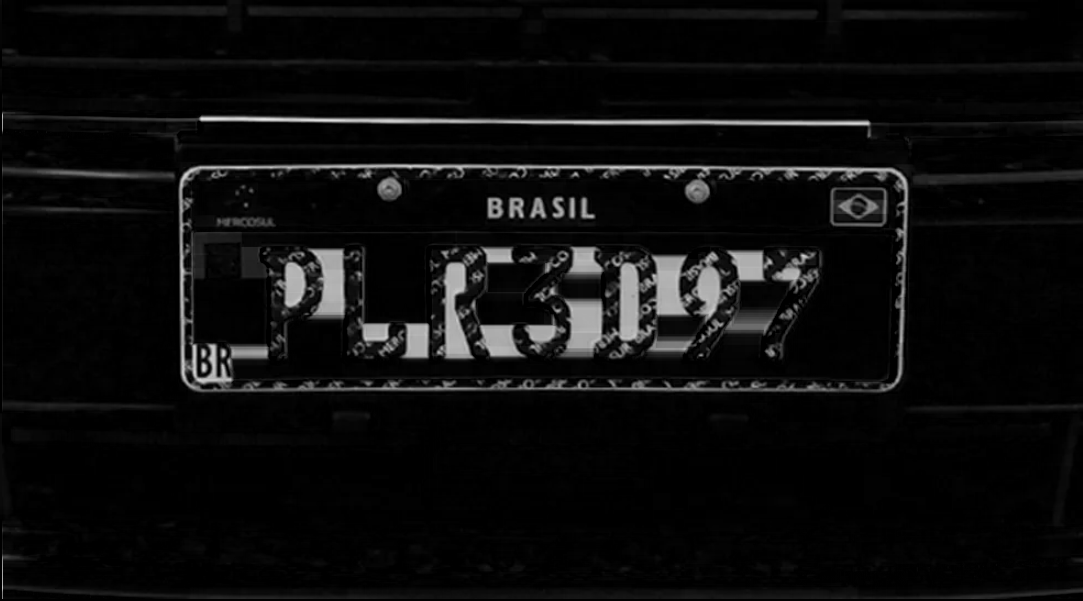

In [30]:
cartola = cv2.morphologyEx(imagem, cv2.MORPH_TOPHAT, kernel_retangular)
cv2_imshow(cartola)


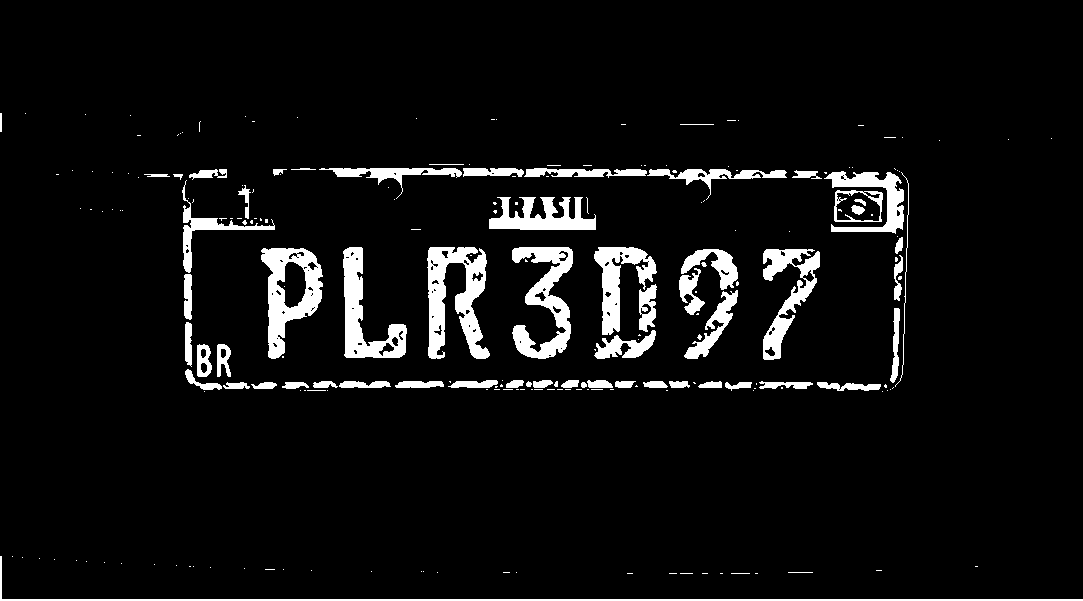

In [31]:
chapeu_preto = cv2.morphologyEx(lim_otsu, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(chapeu_preto)


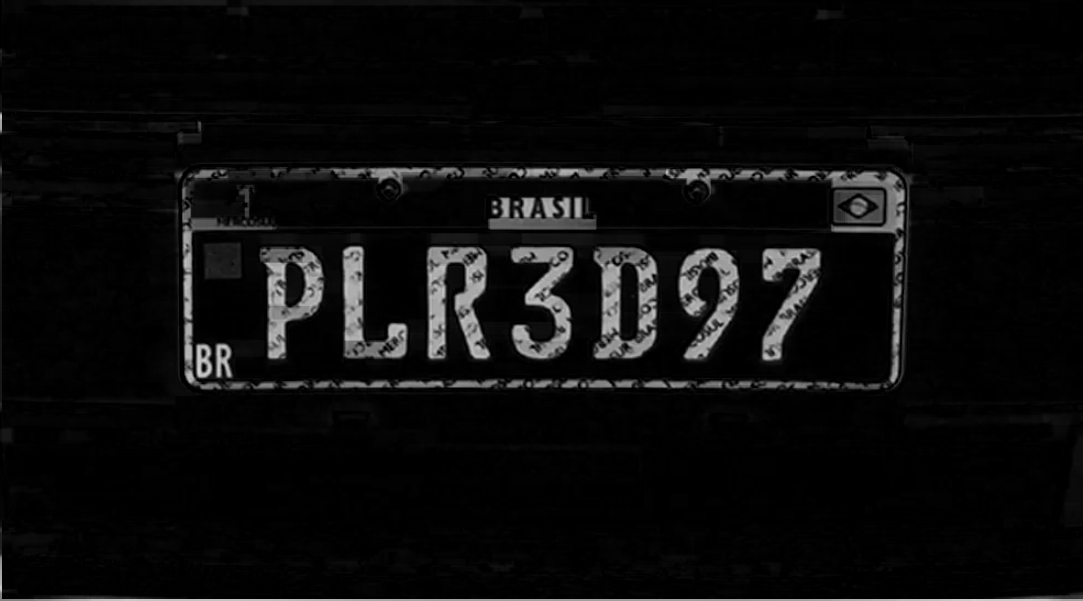

In [32]:
chapeu_preto = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(chapeu_preto)


In [33]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang = 'por',  config = config_tesseract)
print(texto)


, PLRSD97 |
— :” NS ss



Detecção de bordas de Canny

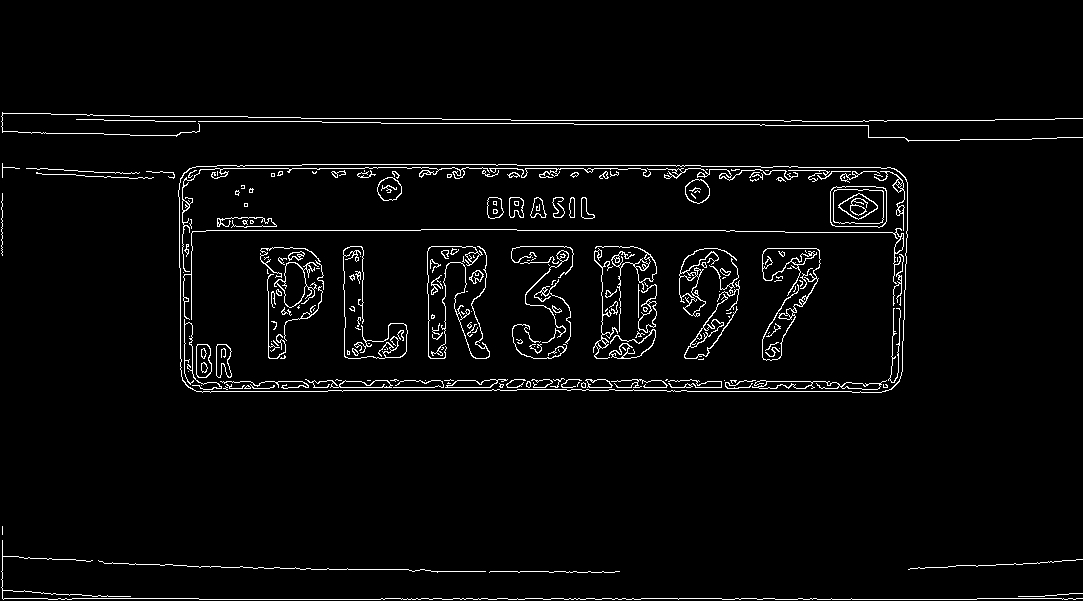

In [34]:
bordas = cv2.Canny(imagem, 100, 200)
cv2_imshow(bordas)

In [35]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [36]:
contornos

(array([[[1069,  593]],
 
        [[1068,  594]],
 
        [[1057,  594]],
 
        [[1056,  595]],
 
        [[1045,  595]],
 
        [[1044,  596]],
 
        [[1018,  596]],
 
        [[1044,  596]],
 
        [[1045,  595]],
 
        [[1056,  595]],
 
        [[1057,  594]],
 
        [[1068,  594]],
 
        [[1069,  593]],
 
        [[1082,  593]]], dtype=int32),
 array([[[490, 571]],
 
        [[489, 572]],
 
        [[490, 571]],
 
        [[517, 571]],
 
        [[518, 572]],
 
        [[519, 572]],
 
        [[520, 571]],
 
        [[548, 571]],
 
        [[549, 572]],
 
        [[553, 572]],
 
        [[554, 571]],
 
        [[565, 571]],
 
        [[566, 572]],
 
        [[568, 572]],
 
        [[569, 571]],
 
        [[570, 572]],
 
        [[572, 572]],
 
        [[573, 571]],
 
        [[576, 571]],
 
        [[577, 572]],
 
        [[587, 572]],
 
        [[588, 571]],
 
        [[590, 571]],
 
        [[591, 572]],
 
        [[601, 572]],
 
        [[602, 571]],
 

In [47]:
for contorno in contornos:
        epsilon = 0.02 * cv2.arcLength(contorno, True)
        aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
        if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
          break

In [48]:
 localizacao = aproximacao

In [49]:
 localizacao

array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)

In [50]:
x, y, w, h = cv2.boundingRect(localizacao)

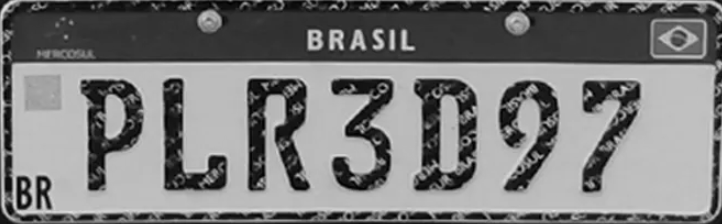

In [51]:
placa = imagem[y:y+h, x:x+w]
cv2_imshow(placa)

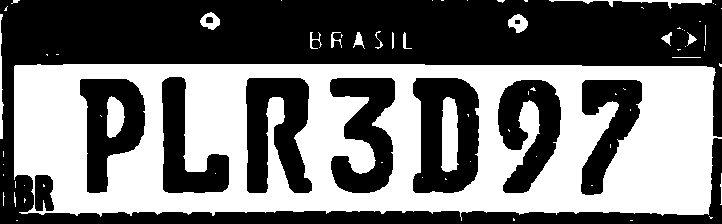

In [52]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
erosao = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (4,4)))
cv2_imshow(erosao)

In [54]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang = 'por',config= config_tesseract)
print(texto)

L PLR3D97



In [55]:
import re
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
texto_extraido

<re.Match object; span=(2, 9), match='PLR3D97'>

In [56]:
print(texto_extraido.group(0))

PLR3D97


Aplicação em outro cenário

In [57]:
imagem = cv2.imread('/content/placa_carro2.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

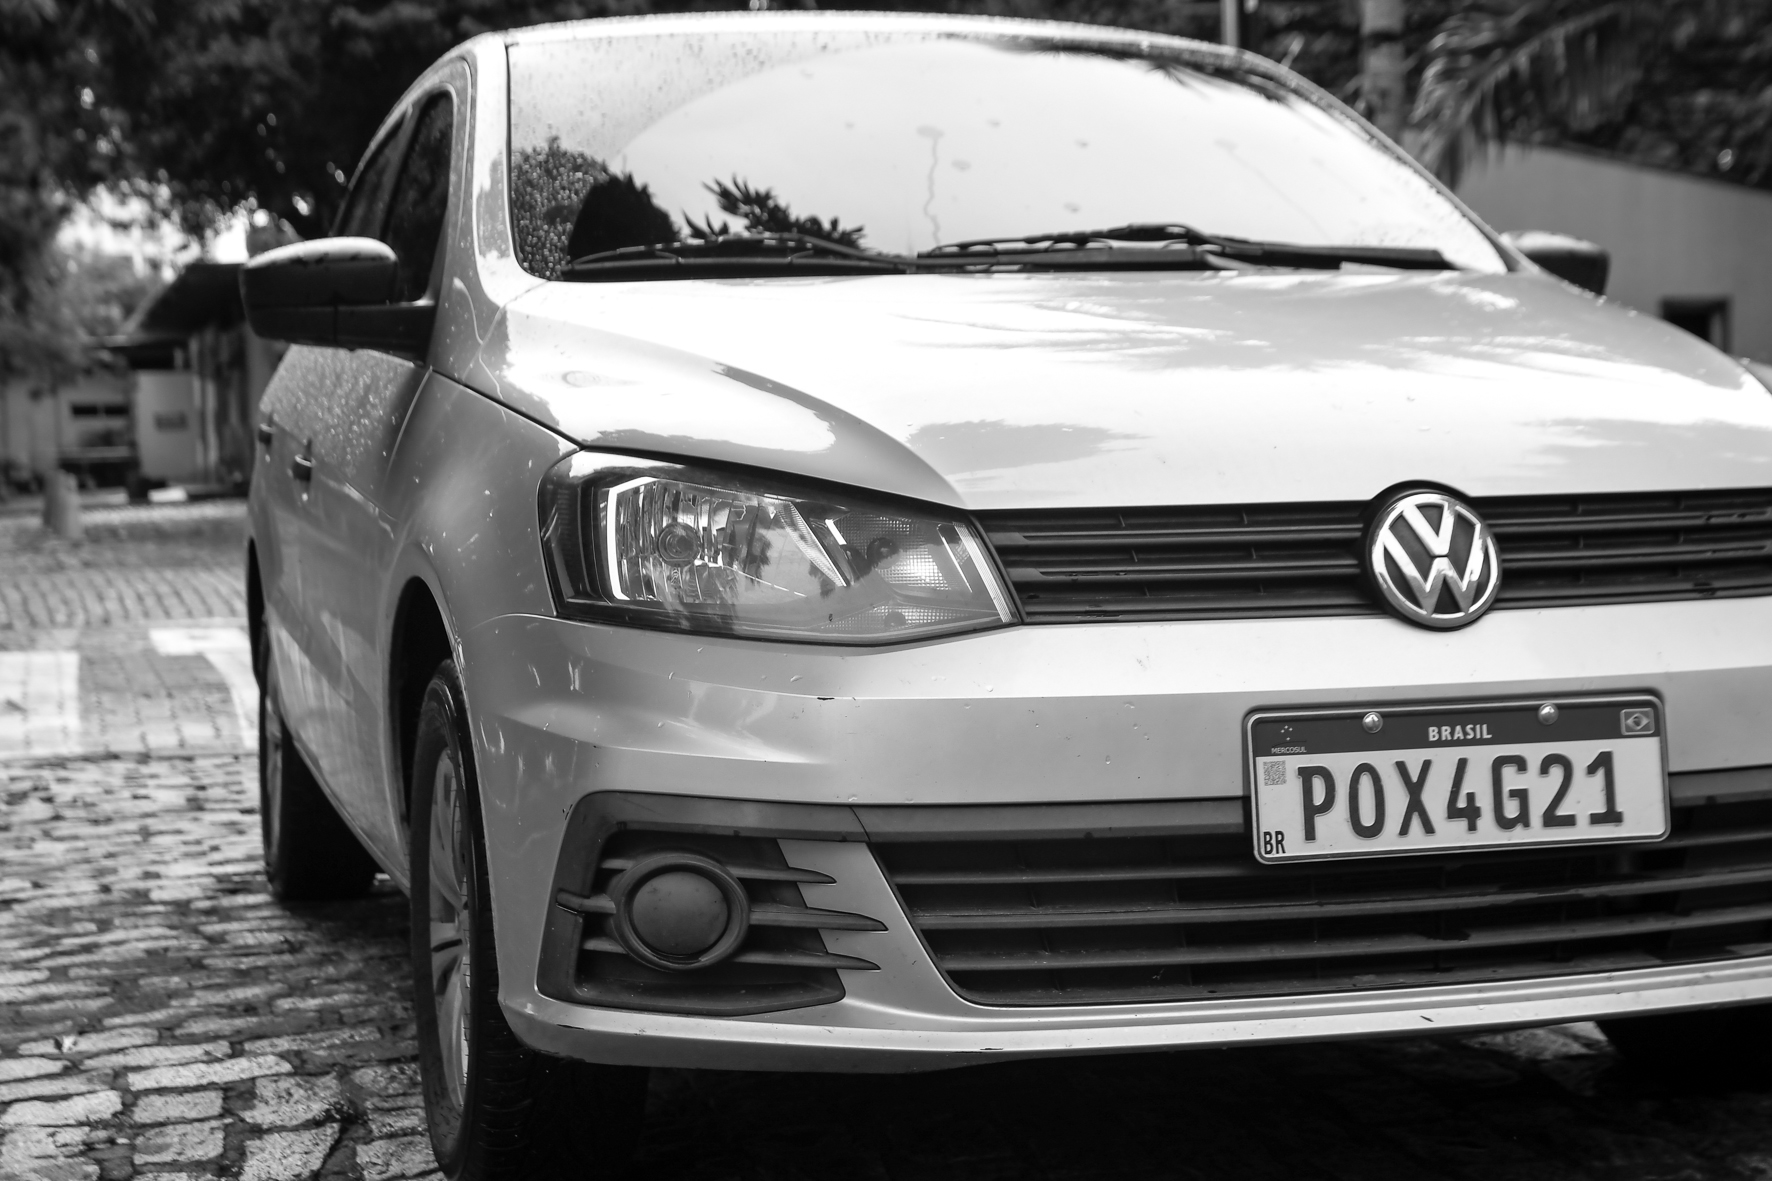

In [58]:
cv2_imshow(imagem)

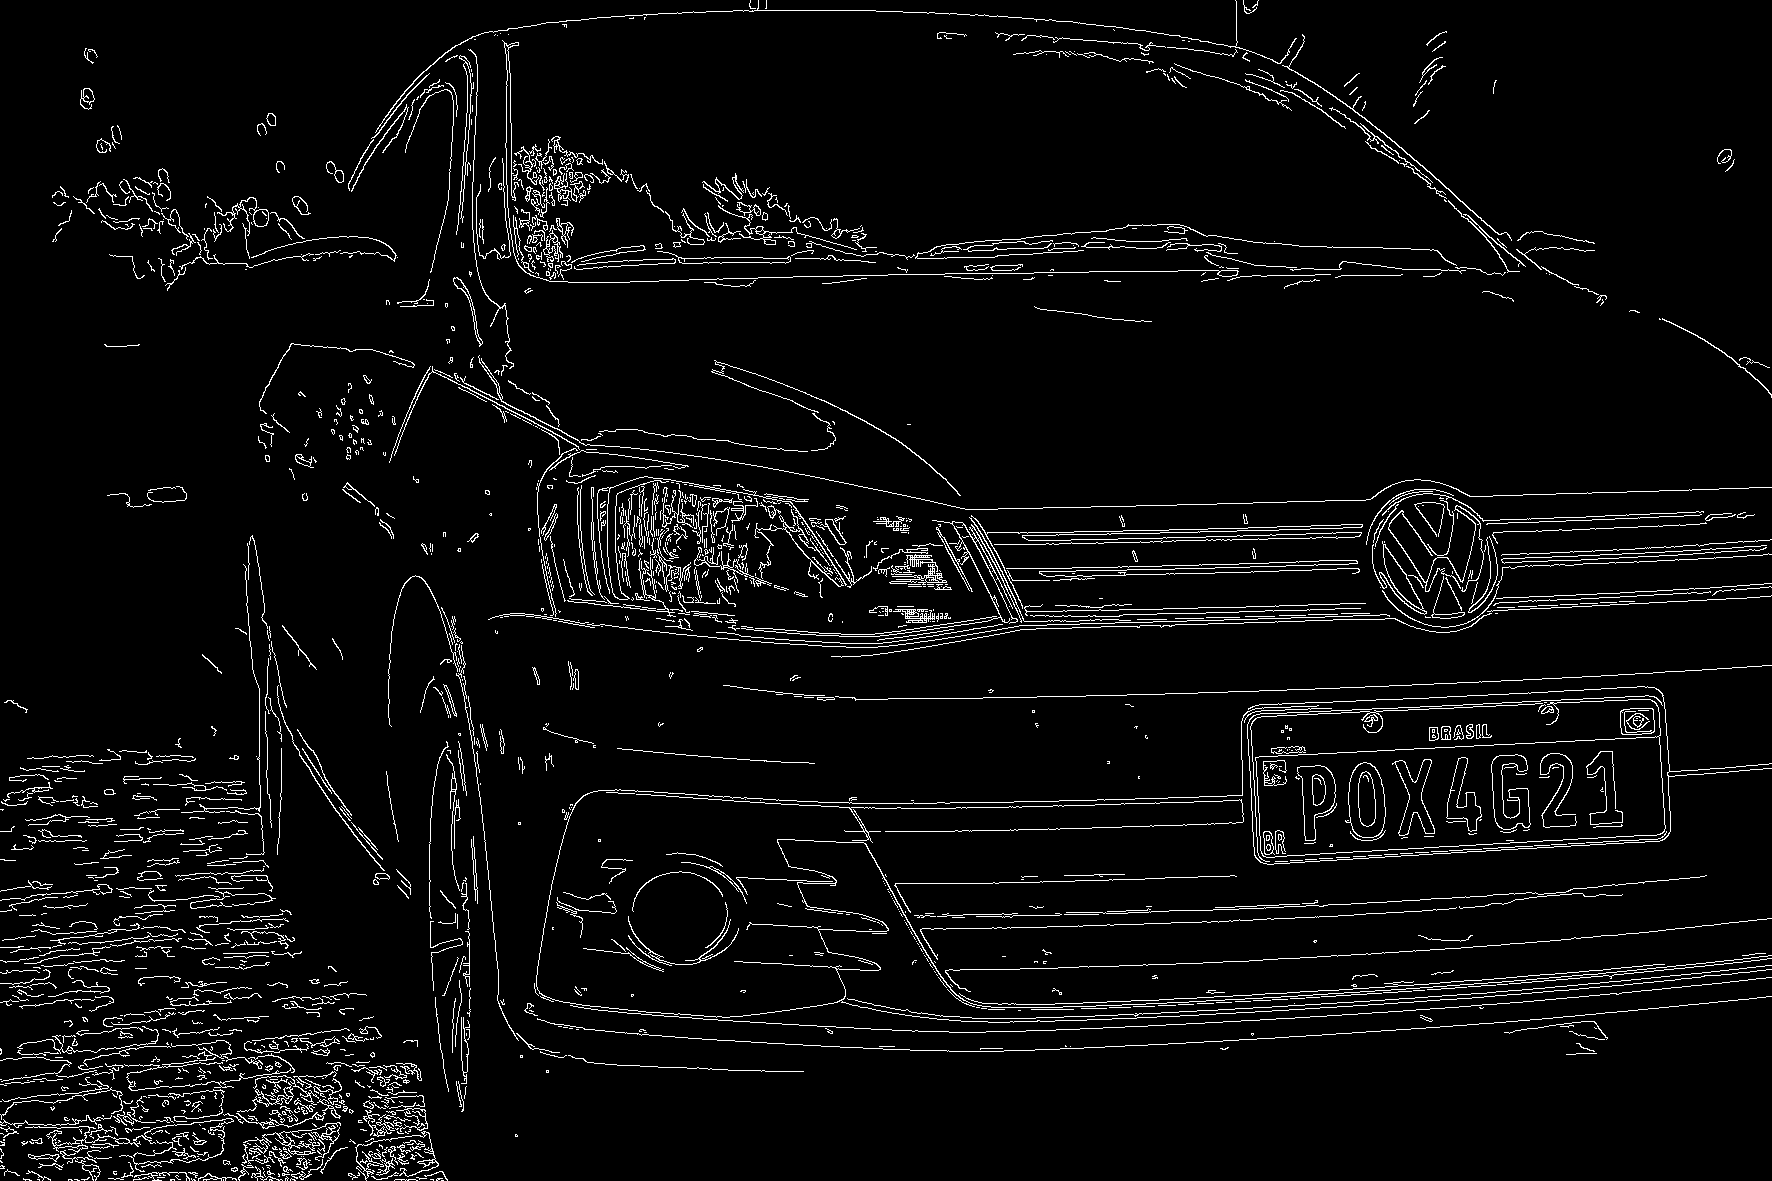

In [59]:
bordas = cv2.Canny(imagem, 100, 200)
cv2_imshow(bordas)

In [62]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key = cv2.contourArea, reverse=True)[:10]

In [63]:
for contorno in contornos:
        epsilon = 0.02 * cv2.arcLength(contorno, True)
        aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
        if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
                    localizacao = aproximacao
                    break

In [64]:
localizacao

array([[[1659,  737]],

       [[1656,  835]],

       [[1260,  850]],

       [[1259,  756]]], dtype=int32)

In [65]:
x, y, w, h = cv2.boundingRect(localizacao)

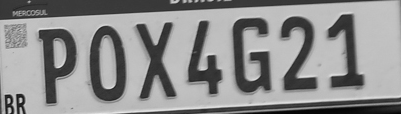

In [66]:
placa = imagem[y:y+h, x:x+w]
cv2_imshow(placa)

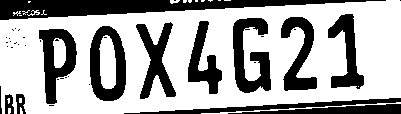

In [68]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(lim_otsu)

In [70]:
texto = pytesseract.image_to_string(lim_otsu, lang='por', config= config_tesseract)
print(texto)

“POX4G21



In [71]:
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
texto_extraido

<re.Match object; span=(1, 8), match='POX4G21'>

In [72]:
print(texto_extraido.group(0))

POX4G21


Leitura de placa de carro utilizando o Black Hat

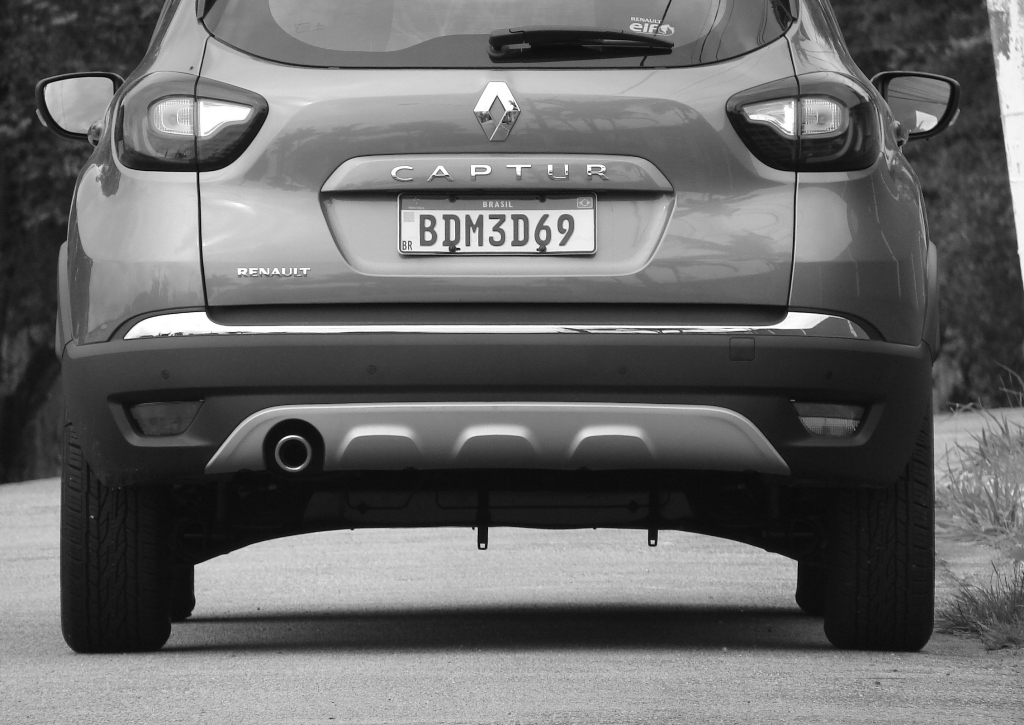

In [76]:
imagem = cv2.imread('/content/placa_carro3.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem)

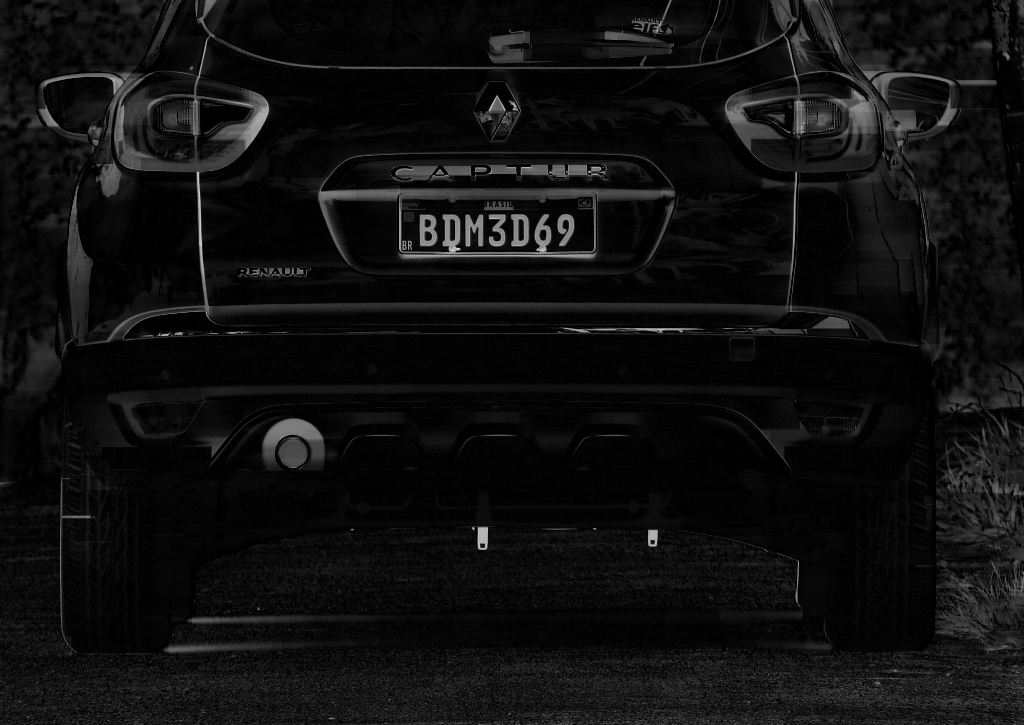

In [77]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
chapeu_preto = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(chapeu_preto)

In [78]:
sobel_x = cv2.Sobel(chapeu_preto, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = 1)

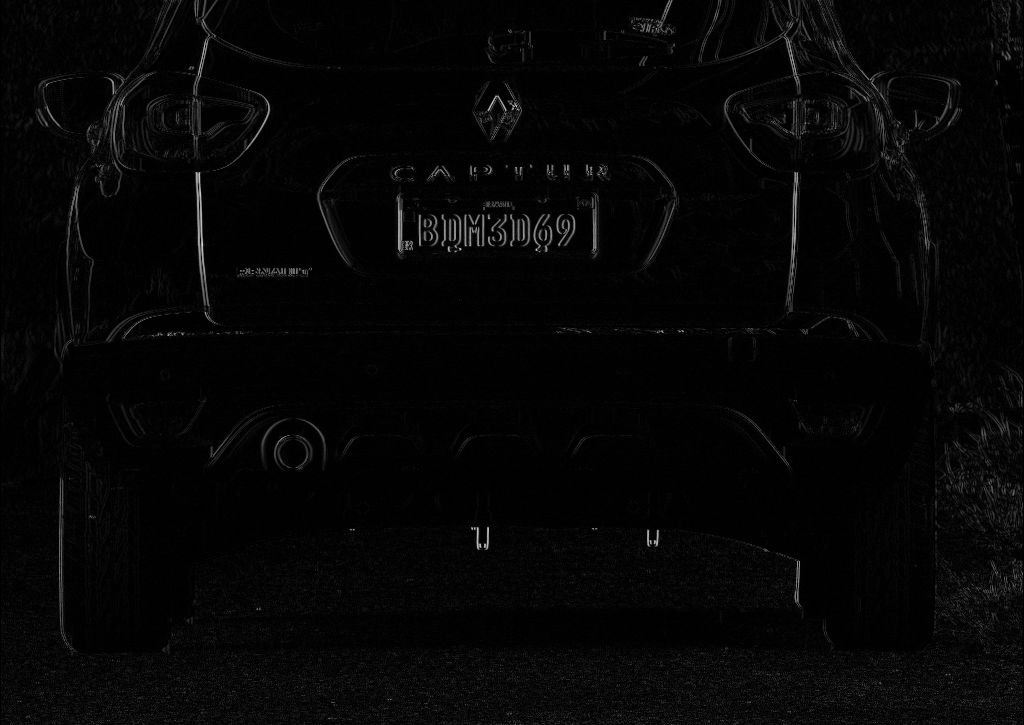

In [79]:
import numpy as np

sobel_x = cv2.Sobel(chapeu_preto, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = 1)
sobel_x = np.absolute(sobel_x)
sobel_x = sobel_x.astype('uint8')
cv2_imshow(sobel_x)

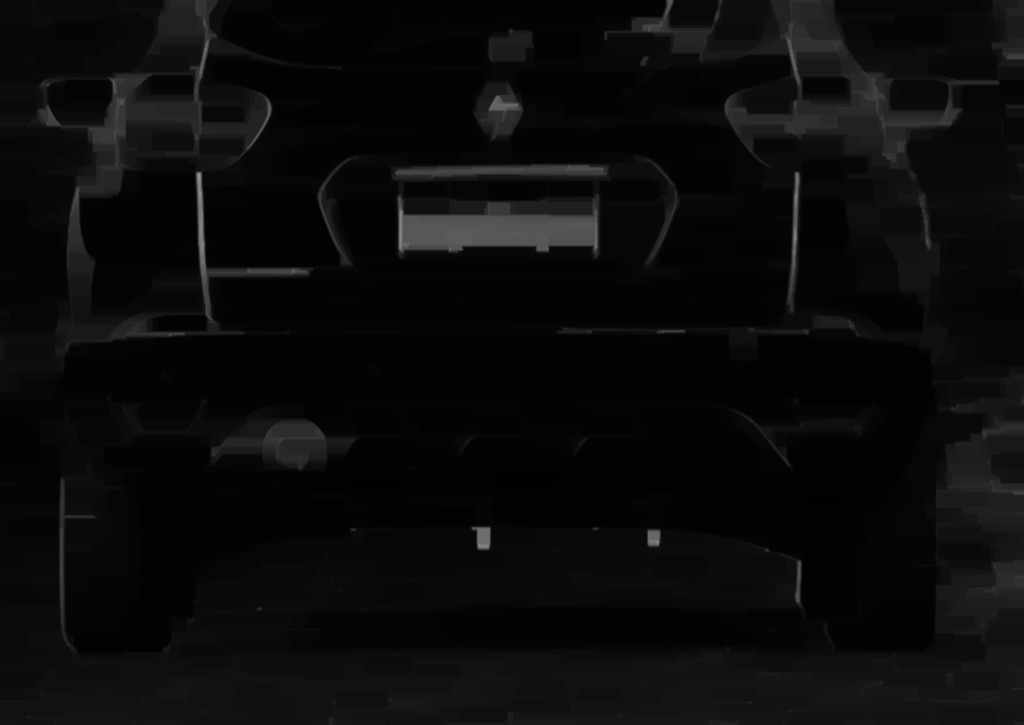

In [80]:
sobel_x = cv2.GaussianBlur(sobel_x, (5,5), 0)
sobel_x = cv2.morphologyEx(sobel_x, cv2.MORPH_CLOSE, kernel_retangular)
cv2_imshow(sobel_x)

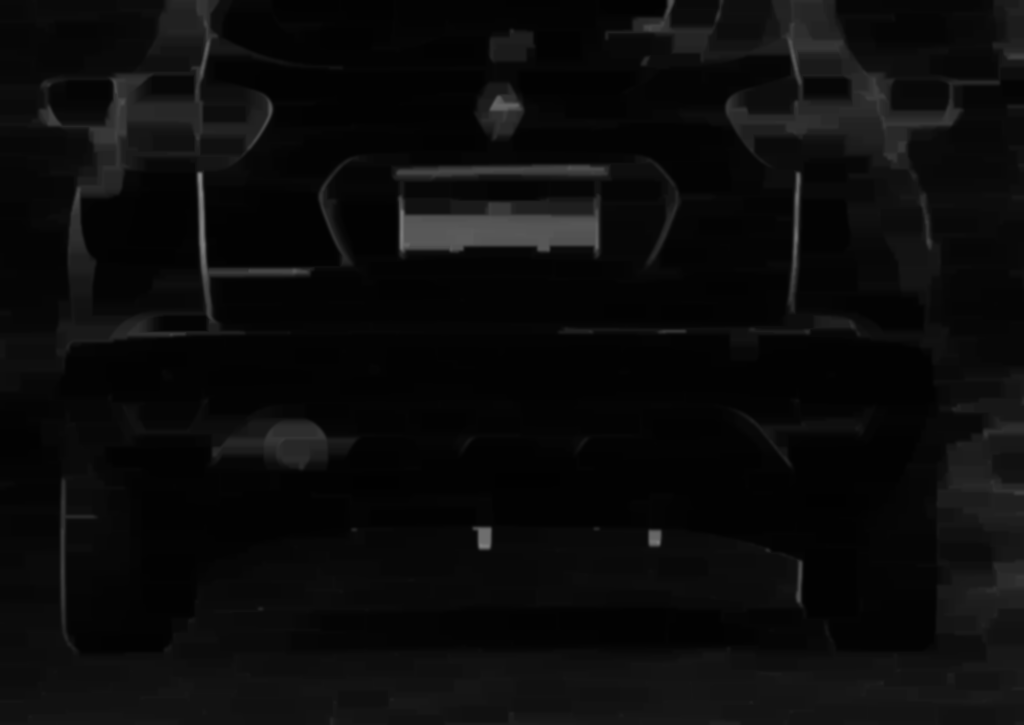

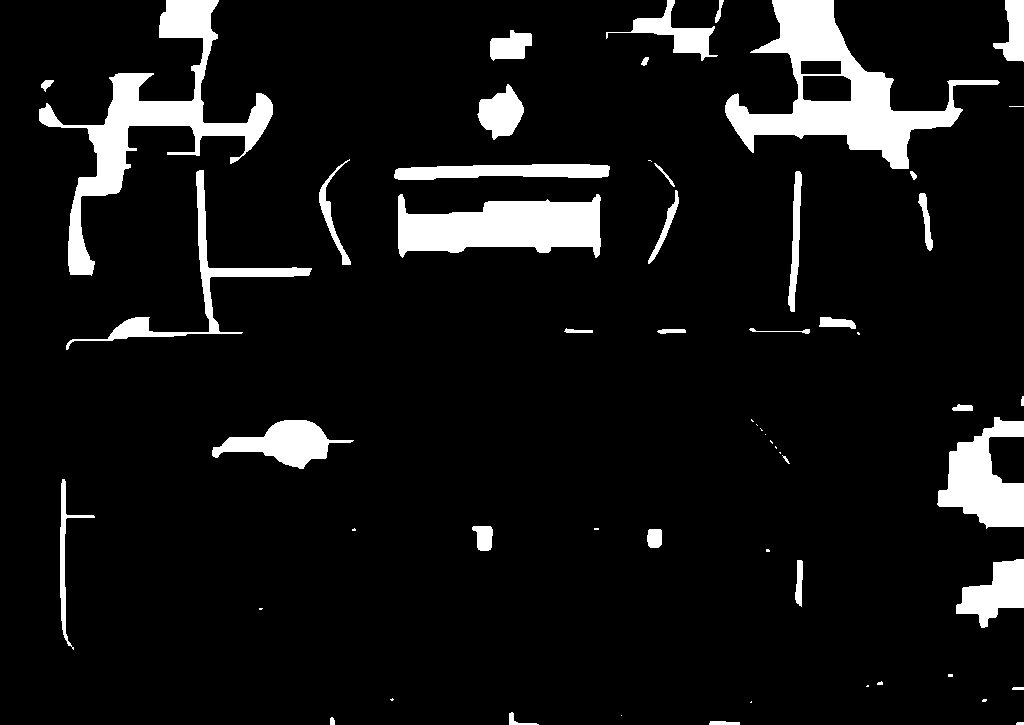

In [81]:
sobel_x = cv2.GaussianBlur(sobel_x, (5,5), 0)
sobel_x = cv2.morphologyEx(sobel_x, cv2.MORPH_CLOSE, kernel_retangular)
cv2_imshow(sobel_x)

valor, limiarizacao = cv2.threshold(sobel_x, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(limiarizacao)

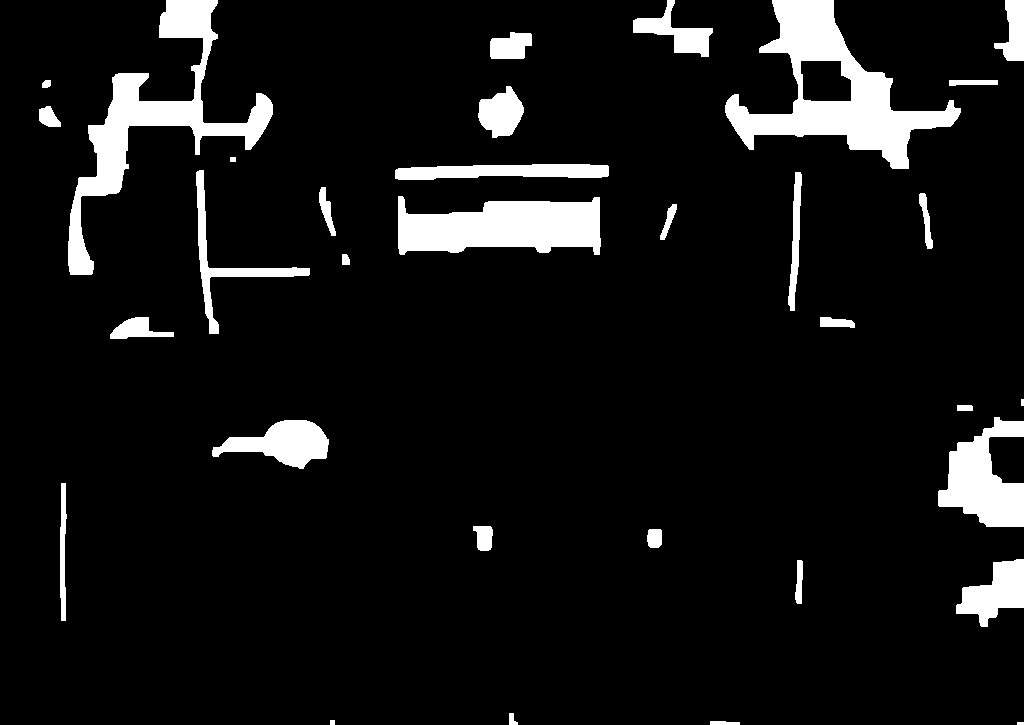

In [82]:
kernel_quadrado = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
limiarizacao = cv2.erode(limiarizacao, kernel_quadrado, iterations = 2)
limiarizacao = cv2.dilate(limiarizacao, kernel_quadrado, iterations = 2)
cv2_imshow(limiarizacao)

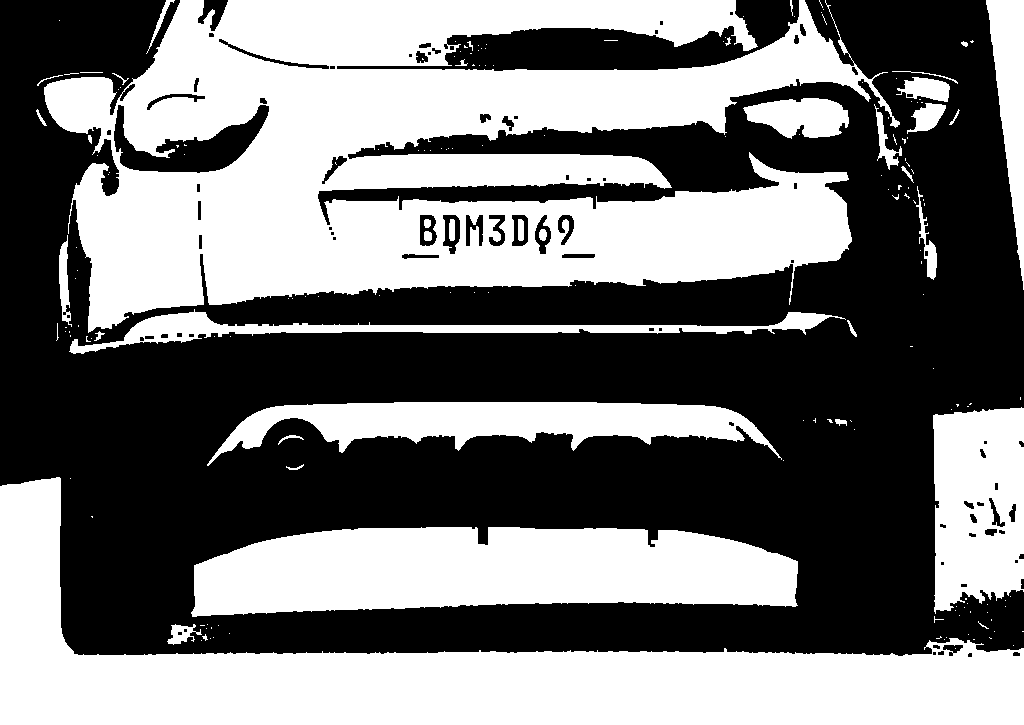

In [83]:
fechamento = cv2.morphologyEx(imagem, cv2.MORPH_CLOSE, kernel_quadrado)
valor, mascara = cv2.threshold(fechamento, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(mascara)

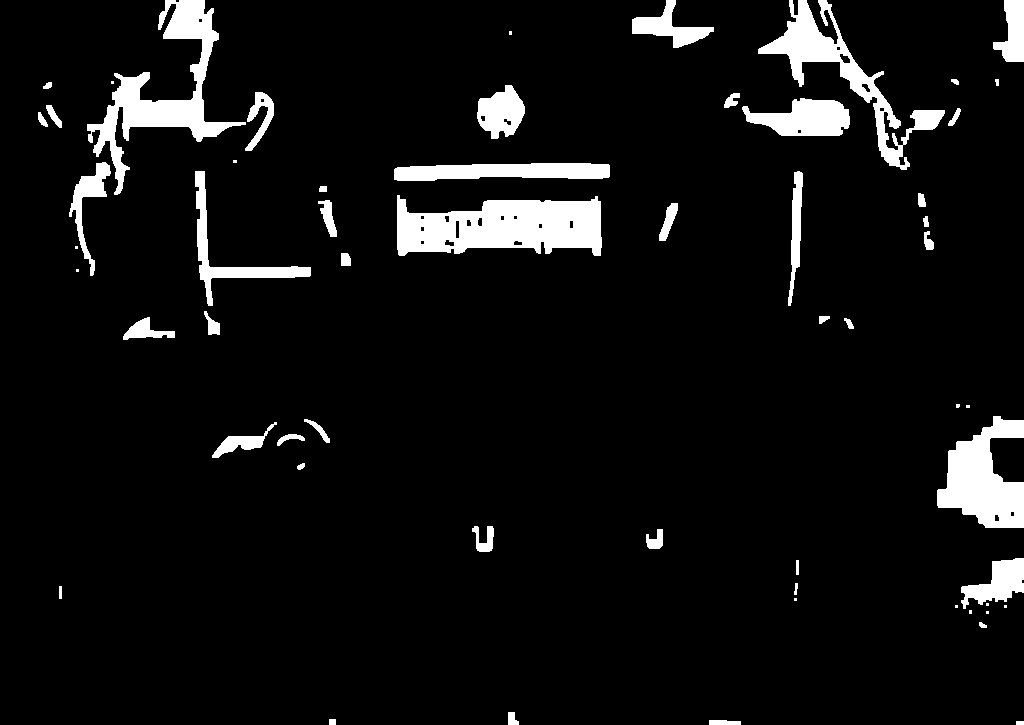

In [85]:
limiarizacao = cv2.bitwise_and(limiarizacao, limiarizacao, mask = mascara)
limiarizacao = cv2.dilate(limiarizacao, kernel_quadrado, iterations = 2)
limiarizacao = cv2.erode(limiarizacao, kernel_quadrado)
cv2_imshow(limiarizacao)

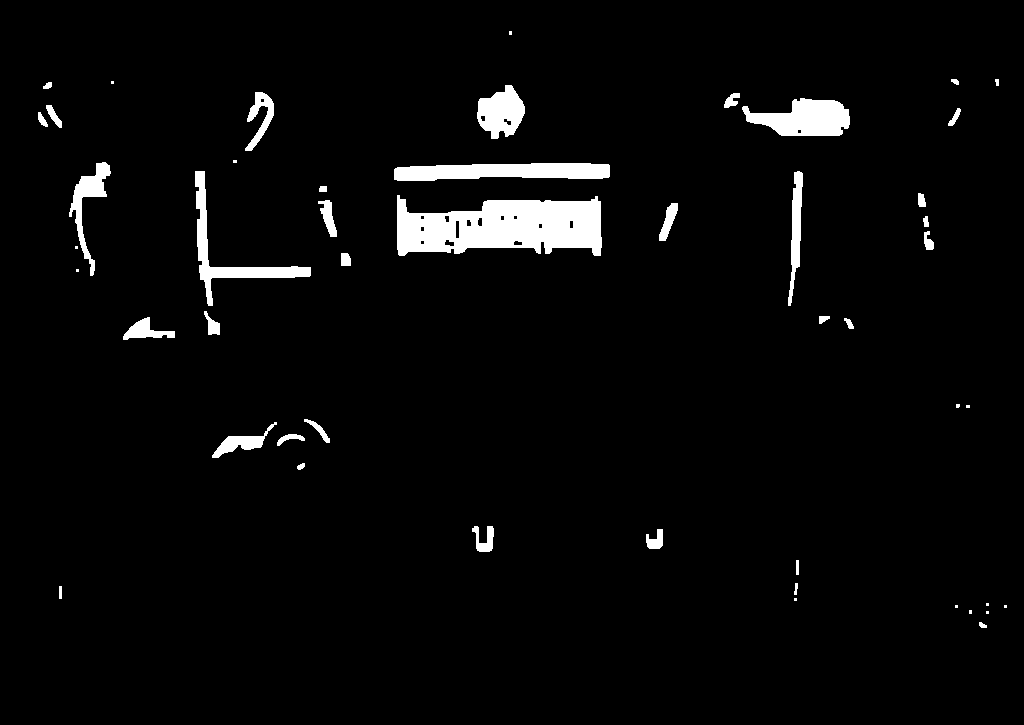

In [86]:
from skimage.segmentation import clear_border
limiarizacao = clear_border(limiarizacao)
cv2_imshow(limiarizacao)


In [87]:
contornos, hierarquia = cv2.findContours(limiarizacao, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key = cv2.contourArea, reverse = True)[:10]
contornos

[array([[[397, 195]],
 
        [[397, 249]],
 
        [[398, 250]],
 
        [[398, 254]],
 
        [[399, 255]],
 
        [[404, 255]],
 
        [[408, 251]],
 
        [[446, 251]],
 
        [[447, 252]],
 
        [[450, 252]],
 
        [[450, 249]],
 
        [[451, 248]],
 
        [[453, 248]],
 
        [[454, 249]],
 
        [[454, 253]],
 
        [[459, 253]],
 
        [[460, 252]],
 
        [[462, 252]],
 
        [[463, 251]],
 
        [[464, 251]],
 
        [[464, 250]],
 
        [[467, 247]],
 
        [[533, 247]],
 
        [[535, 249]],
 
        [[535, 250]],
 
        [[536, 251]],
 
        [[536, 252]],
 
        [[537, 252]],
 
        [[538, 253]],
 
        [[540, 253]],
 
        [[540, 242]],
 
        [[541, 241]],
 
        [[543, 241]],
 
        [[544, 242]],
 
        [[544, 247]],
 
        [[545, 248]],
 
        [[545, 253]],
 
        [[549, 253]],
 
        [[551, 251]],
 
        [[551, 248]],
 
        [[552, 247]],
 
        [[591, 2

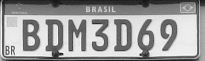

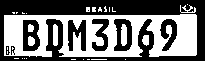

In [88]:
for contorno in contornos:
        x, y, w, h = cv2.boundingRect(contorno)
        proporcao = float(w)/h
        if proporcao >=3 and proporcao <= 3.5:
            placa = imagem[y:y+h, x:x+w]
            valor, regiao_interesse = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
            regiao_interesse = clear_border(regiao_interesse)
            cv2_imshow(placa)
            cv2_imshow(regiao_interesse)


In [89]:
texto = pytesseract.image_to_string(regiao_interesse, lang = 'por', config = config_tesseract)
print(texto)


.BDM3D69



In [90]:
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
texto_extraido


<re.Match object; span=(1, 8), match='BDM3D69'>

In [91]:
print(texto_extraido.group(0))


BDM3D69
